In [2]:
import osmnx as ox
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Polygon
from glob import glob

In [120]:
from math import radians, sin, cos, sqrt, atan2
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1
    a = sin(d_lat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(d_lon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  # Radius of Earth in kilometers
    return distance

def get_nearest_polygon(latitude, longitude, gdf):
    min_distance = np.inf
    for i in gdf.loc[:, ["geometry"]].query("geometry.type == 'Polygon'").geometry:
        lat = i.centroid.y
        lon = i.centroid.x
        distance = haversine_distance(latitude, longitude, lat, lon)
        if distance < min_distance:
            min_distance = distance
            polygon = i
    return polygon



- For Saarbrucken Only!
- Extracting from the label of DIY and hardware stores

In [6]:
place_name = "Saarbrücken,Germany"
baumarkt_places = (ox.geometries_from_place(place_name, tags={'shop': ['doityourself', 'hardware']}))


/tmp/ipykernel_78246/2368214502.py:2: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  baumarkt_places = (ox.geometries_from_place(place_name, tags={'shop': ['doityourself', 'hardware']}))


In [7]:
baumarkt_places

branch            brand brand:wikidata  \
element_type osmid                                                  
node         314874378   Drive In         HORNBACH        Q685926   
             383763984        NaN  Globus Baumarkt        Q457503   
             510757957        NaN              NaN            NaN   
             522098882        NaN            tedox       Q2399946   
             534156603        NaN              NaN            NaN   
             953604584        NaN              NaN            NaN   
             1068835010       NaN              NaN            NaN   
             4017197510       NaN              NaN            NaN   
             4040317809       NaN         HORNBACH        Q685926   
             5966432882       NaN            Würth        Q679750   
             6533634254       NaN              NaN            NaN   
             8659523110       NaN              NaN            NaN   
             8911768884       NaN            Würth        Q679750   
way          87290352         NaN              NaN            NaN   
             87290377         NaN              NaN            NaN   
             89719374         NaN              NaN            NaN   
             286614445        NaN              NaN            NaN   
             542947207        NaN          Bauhaus        Q672043   

                                brand:wikipedia drive_in internet_access  \
element_type osmid                                                         
node         314874378   en:Hornbach (retailer)      yes            wlan   
             383763984                      NaN      NaN             NaN   
             510757957                      NaN      NaN             NaN   
             522098882                      NaN      NaN             NaN   
             534156603                      NaN      NaN             NaN   
             953604584                      NaN      NaN             NaN   
             1068835010                     NaN      NaN             NaN   
             4017197510                     NaN      NaN             NaN   
             4040317809  en:Hornbach (retailer)      NaN            wlan   
             5966432882         de:Würth-Gruppe      NaN             NaN   
             6533634254                     NaN      NaN             NaN   
             8659523110                     NaN      NaN             NaN   
             8911768884         de:Würth-Gruppe      NaN             NaN   
way          87290352                       NaN      NaN             NaN   
             87290377                       NaN      NaN             NaN   
             89719374                       NaN      NaN             NaN   
             286614445                      NaN      NaN             NaN   
             542947207     en:Bauhaus (company)      NaN            wlan   

                        internet_access:fee internet_access:ssid  \
element_type osmid                                                 
node         314874378                   no      HORNBACH Kunden   
             383763984                  NaN                  NaN   
             510757957                  NaN                  NaN   
             522098882                  NaN                  NaN   
             534156603                  NaN                  NaN   
             953604584                  NaN                  NaN   
             1068835010                 NaN                  NaN   
             4017197510                 NaN                  NaN   
             4040317809                  no      HORNBACH Kunden   
             5966432882                 NaN                  NaN   
             6533634254                 NaN                  NaN   
             8659523110                 NaN                  NaN   
             8911768884                 NaN                  NaN   
way          87290352                   NaN                  NaN   
             87290377                

#### For whole Germany

In [24]:
baumarkt_names_list = [
    "OBI", "Bauhaus", "Hornbach", "toom Baumarkt", "Hagebau",
    "Globus Baumarkt", "Hellweg", "BayWa Bau & Garten",
    "Raiffeisen-Markt", "Bauzentrum"
]
place_name = 'Germany'
baumarkt_places = (ox.geometries_from_place(place_name, tags={'shop': ['doityourself', 'hardware']}))


In [16]:
baumarkt_places.head()

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                            
node         290504923        Isny im Allgäu                1         88316   
             339366299   Immenstadt i.Allgäu               71         87509   
             503138148                   NaN              NaN           NaN   
             938775166                   NaN              NaN           NaN   
             1043577331                  NaN              NaN           NaN   

                                addr:street brand brand:wikidata  \
element_type osmid                                                 
node         290504923          Am Bühlberg   OBI        Q300518   
             339366299   Sonthofener Straße   NaN            NaN   
             503138148                  NaN   NaN            NaN   
             938775166                  NaN   NaN            NaN   
             1043577331                 NaN   NaN            NaN   

                           brand:wikipedia           name  \
element_type osmid                                          
node         290504923   de:Obi (Baumarkt)            OBI   
             339366299                 NaN   V - Baumarkt   
             503138148                 NaN  Holzfachmarkt   
             938775166                 NaN     König Hans   
             1043577331                NaN   Eisen Schmid   

                                             opening_hours          shop  ...  \
element_type osmid                                                        ...   
node         290504923   Mo-Fr 08:30-19:00; Sa 08:30-18:00  doityourself  ...   
             339366299        Mo-Sa 08:00-20:00; Su,PH off  doityourself  ...   
             503138148                                 NaN  doityourself  ...   
             938775166                                 NaN      hardware  ...   
             1043577331                                NaN      hardware  ...   

                        payment:bank_card old_addr:housenumber  \
element_type osmid                                               
node         290504923                NaN                  NaN   
             339366299                NaN                  NaN   
             503138148                NaN                  NaN   
             938775166                NaN                  NaN   
             1043577331               NaN                  NaN   

                        old_addr:street payment:bancomat full_name  \
element_type osmid                                                   
node         290504923              NaN              NaN       NaN   
             339366299              NaN              NaN       NaN   
             503138148              NaN              NaN       NaN   
             938775166              NaN              NaN       NaN   
             1043577331             NaN              NaN       NaN   

                        building:use:retail payment:litecoin payment:laser  \
element_type osmid                                                           
node         290504923                  NaN              NaN           NaN   
             339366299                  NaN              NaN           NaN   
             503138148                  NaN              NaN           NaN   
             938775166                  NaN              NaN           NaN   
             1043577331                 NaN              NaN           NaN   

                        note_de sells:municipal_waste_bag  
element_type osmid                                         
node         290504923      NaN                       NaN  
             339366299      NaN                       NaN  
             503138148      NaN                       NaN  
             938775166      NaN                       NaN  
             1043577331     NaN                       NaN  

[5 rows x 386 columns]

In [17]:
print(baumarkt_places.shape)

(7386, 386)


In [126]:
baumarkt_places

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                            
node         290504923        Isny im Allgäu                1         88316   
             339366299   Immenstadt i.Allgäu               71         87509   
             503138148                   NaN              NaN           NaN   
             938775166                   NaN              NaN           NaN   
             1043577331                  NaN              NaN           NaN   
...                                      ...              ...           ...   
way          245658157                   NaN              NaN           NaN   
             270405941                 Kleve                1         47533   
             310953330            Kranenburg               28         47559   
             334593317              Kevelaer                8         47626   
             380126562                 Kleve                1         47533   

                                 addr:street         brand brand:wikidata  \
element_type osmid                                                          
node         290504923           Am Bühlberg           OBI        Q300518   
             339366299    Sonthofener Straße           NaN            NaN   
             503138148                   NaN           NaN            NaN   
             938775166                   NaN           NaN            NaN   
             1043577331                  NaN           NaN            NaN   
...                                      ...           ...            ...   
way          245658157                   NaN           NaN            NaN   
             270405941           Klever Ring  Hagebaumarkt       Q1568279   
             310953330             Im Schlop           NaN            NaN   
             334593317          Wissener Weg           NaN            NaN   
             380126562   Gertrud-Boss-Straße           NaN            NaN   

                           brand:wikipedia                            name  \
element_type osmid                                                           
node         290504923   de:Obi (Baumarkt)                             OBI   
             339366299                 NaN                    V - Baumarkt   
             503138148                 NaN                   Holzfachmarkt   
             938775166                 NaN                      König Hans   
             1043577331                NaN                    Eisen Schmid   
...                                    ...                             ...   
way          245658157                 NaN       BAUEN+LEBEN GmbH & Co. KG   
             270405941          de:Hagebau                    Hagebaumarkt   
             310953330                 NaN             Komtec Gartengeräte   
             334593317                 NaN  Thomas Hegerath Bauunternehnen   
             380126562                 NaN                    van Beusekom   

                                             opening_hours          shop  ...  \
element_type osmid                                                        ...   
node         290504923   Mo-Fr 08:30-19:00; Sa 08:30-18:00  doityourself  ...   
             339366299        Mo-Sa 08:00-20:00; Su,PH off  doityourself  ...   
             503138148                                 NaN  doityourself  ...   
             938775166                                 NaN      hardware  ...   
             1043577331                                NaN      hardware  ...   
...                                                    ...           ...  ...   
way          245658157                                 NaN  doityourself  ...   
             270405941   Mo-Fr 08:00-19:30; Sa 08:00-18:00  doityourself  ...   
             310953330                                 NaN  doityourself  ...   
             334593317                                 NaN  doityourself  ...   
             38012

In [43]:
indexes = []
for index, i in enumerate(range(len(baumarkt_places))):
    name = baumarkt_places.iloc[i]['name']
    for baumarkt_name in baumarkt_names_list:
        if baumarkt_name.lower().find(str(name).lower()) != -1:
            indexes.append(index)

In [45]:
len(indexes)

1345

In [47]:
baumarkt_places.iloc[indexes]

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                          
node         290504923      Isny im Allgäu                1         88316   
             8869263946                NaN              NaN           NaN   
             818598525                 NaN              NaN           NaN   
             3762960708     Bad Grönenbach               31         87730   
way          34201992            Memmingen                2         87700   
...                                    ...              ...           ...   
             276716321                 NaN              NaN           NaN   
             1144902163                NaN              NaN           NaN   
node         3700403102                NaN              NaN           NaN   
way          108686277                 NaN              NaN           NaN   
             238089125   Emmerich am Rhein                1         46446   

                              addr:street             brand brand:wikidata  \
element_type osmid                                                           
node         290504923        Am Bühlberg               OBI        Q300518   
             8869263946               NaN  Raiffeisen-Markt     Q107415020   
             818598525                NaN               NaN            NaN   
             3762960708     Bahnhofstraße  Raiffeisen-Markt     Q107415020   
way          34201992    Fraunhoferstraße           Bauhaus        Q672043   
...                                   ...               ...            ...   
             276716321                NaN               NaN            NaN   
             1144902163               NaN     toom Baumarkt       Q2442970   
node         3700403102               NaN  Raiffeisen-Markt     Q107415020   
way          108686277                NaN  Raiffeisen-Markt     Q107415020   
             238089125   Budberger Straße               OBI        Q300518   

                              brand:wikipedia              name  \
element_type osmid                                                
node         290504923      de:Obi (Baumarkt)               OBI   
             8869263946                   NaN  Raiffeisen-Markt   
             818598525                    NaN             Baywa   
             3762960708                   NaN  Raiffeisen-Markt   
way          34201992    en:Bauhaus (company)           Bauhaus   
...                                       ...               ...   
             276716321                    NaN          Hornbach   
             1144902163                   NaN     toom Baumarkt   
node         3700403102                   NaN  Raiffeisen-Markt   
way          108686277                    NaN  Raiffeisen-Markt   
             238089125      de:Obi (Baumarkt)               OBI   

                                             opening_hours          shop  ...  \
element_type osmid                                                        ...   
node         290504923   Mo-Fr 08:30-19:00; Sa 08:30-18:00  doityourself  ...   
             8869263946                                NaN  doityourself  ...   
             818598525                                 NaN  doityourself  ...   
             3762960708                                NaN  doityourself  ...   
way          34201992                    Mo-Sa 08:00-20:00  doityourself  ...   
...                                                    ...           ...  ...   
             276716321                   Mo-Sa 07:00-20:00  doityourself  ...   
             1144902163                                NaN  doityourself  ...   
node         3700403102                                NaN  doityourself  ...   
way          108686277                                 NaN  doityourself  ...   
             238089125                   Mo-Sa 08:00-20:00  doityourself  ...   

                        payment:bank_card old_addr:housenumber  \
element_type osmid      

In [48]:
selected_baumarkt_places = baumarkt_places.iloc[indexes]

In [127]:
selected_baumarkt_places.query("geometry.type == 'Point'")

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                       
node         290504923   Isny im Allgäu                1         88316   
             8869263946             NaN              NaN           NaN   
             818598525              NaN              NaN           NaN   
             3762960708  Bad Grönenbach               31         87730   
             358846859             Buch               31         89290   
...                                 ...              ...           ...   
             2370309852             NaN              NaN           NaN   
             2693493288         Viersen               30         41747   
             7518511157             NaN              NaN           NaN   
             7519114831             NaN              NaN           NaN   
             3700403102             NaN              NaN           NaN   

                                addr:street             brand brand:wikidata  \
element_type osmid                                                             
node         290504923          Am Bühlberg               OBI        Q300518   
             8869263946                 NaN  Raiffeisen-Markt     Q107415020   
             818598525                  NaN               NaN            NaN   
             3762960708       Bahnhofstraße  Raiffeisen-Markt     Q107415020   
             358846859   Unterrother Straße  Raiffeisen-Markt     Q107415020   
...                                     ...               ...            ...   
             2370309852                 NaN  Raiffeisen-Markt     Q107415020   
             2693493288    Kölnische Straße               OBI        Q300518   
             7518511157                 NaN           Bauhaus        Q672043   
             7519114831                 NaN          Hornbach        Q685926   
             3700403102                 NaN  Raiffeisen-Markt     Q107415020   

                                brand:wikipedia              name  \
element_type osmid                                                  
node         290504923        de:Obi (Baumarkt)               OBI   
             8869263946                     NaN  Raiffeisen-Markt   
             818598525                      NaN             Baywa   
             3762960708                     NaN  Raiffeisen-Markt   
             358846859                      NaN  Raiffeisen-Markt   
...                                         ...               ...   
             2370309852                     NaN  Raiffeisen-Markt   
             2693493288       de:Obi (Baumarkt)               OBI   
             7518511157    en:Bauhaus (company)           Bauhaus   
             7519114831  en:Hornbach (retailer)          Hornbach   
             3700403102                     NaN  Raiffeisen-Markt   

                                             opening_hours          shop  ...  \
element_type osmid                                                        ...   
node         290504923   Mo-Fr 08:30-19:00; Sa 08:30-18:00  doityourself  ...   
             8869263946                                NaN  doityourself  ...   
             818598525                                 NaN  doityourself  ...   
             3762960708                                NaN  doityourself  ...   
             358846859                                 NaN  doityourself  ...   
...                                                    ...           ...  ...   
             2370309852                                NaN  doityourself  ...   
             2693493288                  Mo-Sa 08:00-20:00  doityourself  ...   
             7518511157       Mo-Sa 07:00-20:00; PH,Su off  doityourself  ...   
             7519114831                  Mo-Sa 07:00-20:00  doityourself  ...   
             3700403102                                NaN  doityourself  ...   

                        payment:bank_card old_addr:housenumber  \
element_

In [128]:
selected_baumarkt_places = selected_baumarkt_places.query("geometry.type == 'Point'")  # Only selcting points

<Axes: >

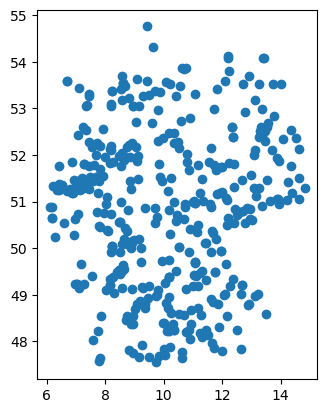

In [134]:
selected_baumarkt_places.plot()

#### Finding Nearby Parkings from selected Baumarkts

In [129]:
selected_baumarkt_places

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                       
node         290504923   Isny im Allgäu                1         88316   
             8869263946             NaN              NaN           NaN   
             818598525              NaN              NaN           NaN   
             3762960708  Bad Grönenbach               31         87730   
             358846859             Buch               31         89290   
...                                 ...              ...           ...   
             2370309852             NaN              NaN           NaN   
             2693493288         Viersen               30         41747   
             7518511157             NaN              NaN           NaN   
             7519114831             NaN              NaN           NaN   
             3700403102             NaN              NaN           NaN   

                                addr:street             brand brand:wikidata  \
element_type osmid                                                             
node         290504923          Am Bühlberg               OBI        Q300518   
             8869263946                 NaN  Raiffeisen-Markt     Q107415020   
             818598525                  NaN               NaN            NaN   
             3762960708       Bahnhofstraße  Raiffeisen-Markt     Q107415020   
             358846859   Unterrother Straße  Raiffeisen-Markt     Q107415020   
...                                     ...               ...            ...   
             2370309852                 NaN  Raiffeisen-Markt     Q107415020   
             2693493288    Kölnische Straße               OBI        Q300518   
             7518511157                 NaN           Bauhaus        Q672043   
             7519114831                 NaN          Hornbach        Q685926   
             3700403102                 NaN  Raiffeisen-Markt     Q107415020   

                                brand:wikipedia              name  \
element_type osmid                                                  
node         290504923        de:Obi (Baumarkt)               OBI   
             8869263946                     NaN  Raiffeisen-Markt   
             818598525                      NaN             Baywa   
             3762960708                     NaN  Raiffeisen-Markt   
             358846859                      NaN  Raiffeisen-Markt   
...                                         ...               ...   
             2370309852                     NaN  Raiffeisen-Markt   
             2693493288       de:Obi (Baumarkt)               OBI   
             7518511157    en:Bauhaus (company)           Bauhaus   
             7519114831  en:Hornbach (retailer)          Hornbach   
             3700403102                     NaN  Raiffeisen-Markt   

                                             opening_hours          shop  ...  \
element_type osmid                                                        ...   
node         290504923   Mo-Fr 08:30-19:00; Sa 08:30-18:00  doityourself  ...   
             8869263946                                NaN  doityourself  ...   
             818598525                                 NaN  doityourself  ...   
             3762960708                                NaN  doityourself  ...   
             358846859                                 NaN  doityourself  ...   
...                                                    ...           ...  ...   
             2370309852                                NaN  doityourself  ...   
             2693493288                  Mo-Sa 08:00-20:00  doityourself  ...   
             7518511157       Mo-Sa 07:00-20:00; PH,Su off  doityourself  ...   
             7519114831                  Mo-Sa 07:00-20:00  doityourself  ...   
             3700403102                                NaN  doityourself  ...   

                        payment:bank_card old_addr:housenumber  \
element_

- Checking for one parking lot

In [130]:
tags={'parking':True}
latitude = selected_baumarkt_places.iloc[0]['geometry'].y
longitude = selected_baumarkt_places.iloc[0]['geometry'].x
gdf = ox.features_from_point((latitude, longitude), dist=1000, tags=tags)

<Axes: >

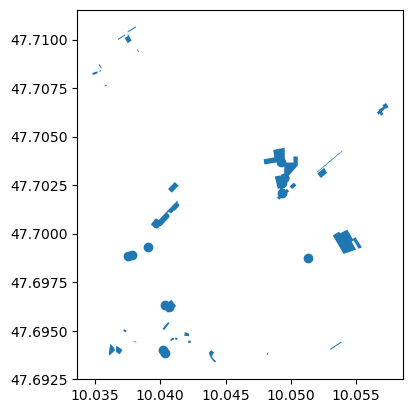

In [131]:
gdf.plot()

In [132]:
min_distance = np.inf
for i in gdf.loc[:, ["geometry"]].query("geometry.type == 'Polygon'").geometry:
    lat = i.centroid.y
    lon = i.centroid.x
    distance = haversine_distance(latitude, longitude, lat, lon)
    if distance < min_distance:
        min_distance = distance
        polygon = i

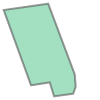

In [133]:
get_nearest_polygon(latitude, longitude, gdf)

In [135]:
selected_baumarkt_places

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                       
node         290504923   Isny im Allgäu                1         88316   
             8869263946             NaN              NaN           NaN   
             818598525              NaN              NaN           NaN   
             3762960708  Bad Grönenbach               31         87730   
             358846859             Buch               31         89290   
...                                 ...              ...           ...   
             2370309852             NaN              NaN           NaN   
             2693493288         Viersen               30         41747   
             7518511157             NaN              NaN           NaN   
             7519114831             NaN              NaN           NaN   
             3700403102             NaN              NaN           NaN   

                                addr:street             brand brand:wikidata  \
element_type osmid                                                             
node         290504923          Am Bühlberg               OBI        Q300518   
             8869263946                 NaN  Raiffeisen-Markt     Q107415020   
             818598525                  NaN               NaN            NaN   
             3762960708       Bahnhofstraße  Raiffeisen-Markt     Q107415020   
             358846859   Unterrother Straße  Raiffeisen-Markt     Q107415020   
...                                     ...               ...            ...   
             2370309852                 NaN  Raiffeisen-Markt     Q107415020   
             2693493288    Kölnische Straße               OBI        Q300518   
             7518511157                 NaN           Bauhaus        Q672043   
             7519114831                 NaN          Hornbach        Q685926   
             3700403102                 NaN  Raiffeisen-Markt     Q107415020   

                                brand:wikipedia              name  \
element_type osmid                                                  
node         290504923        de:Obi (Baumarkt)               OBI   
             8869263946                     NaN  Raiffeisen-Markt   
             818598525                      NaN             Baywa   
             3762960708                     NaN  Raiffeisen-Markt   
             358846859                      NaN  Raiffeisen-Markt   
...                                         ...               ...   
             2370309852                     NaN  Raiffeisen-Markt   
             2693493288       de:Obi (Baumarkt)               OBI   
             7518511157    en:Bauhaus (company)           Bauhaus   
             7519114831  en:Hornbach (retailer)          Hornbach   
             3700403102                     NaN  Raiffeisen-Markt   

                                             opening_hours          shop  ...  \
element_type osmid                                                        ...   
node         290504923   Mo-Fr 08:30-19:00; Sa 08:30-18:00  doityourself  ...   
             8869263946                                NaN  doityourself  ...   
             818598525                                 NaN  doityourself  ...   
             3762960708                                NaN  doityourself  ...   
             358846859                                 NaN  doityourself  ...   
...                                                    ...           ...  ...   
             2370309852                                NaN  doityourself  ...   
             2693493288                  Mo-Sa 08:00-20:00  doityourself  ...   
             7518511157       Mo-Sa 07:00-20:00; PH,Su off  doityourself  ...   
             7519114831                  Mo-Sa 07:00-20:00  doityourself  ...   
             3700403102                                NaN  doityourself  ...   

                        payment:bank_card old_addr:housenumber  \
element_

- Doing it for all Selected Baumarkts

In [139]:
parking_places = []
try:
    for i in range(len(selected_baumarkt_places)):
        latitude = selected_baumarkt_places.iloc[i]['geometry'].y
        longitude = selected_baumarkt_places.iloc[i]['geometry'].x
        gdf = ox.features_from_point((latitude, longitude), dist=1000, tags=tags)
        parking_places.append(get_nearest_polygon(latitude, longitude, gdf))
except:
    pass

In [153]:
# save the parking places as geopadnas dataframe
output_dir = '//home/akansh-i2sc/Desktop/Project/detect-car-LR/notebooks/data_collection/'
os.makedirs(output_dir, exist_ok=True) 

parking_places_gpd = gpd.GeoSeries(parking_places)


output_path = os.path.join(output_dir, f'parking_lot_germany.geojson')
parking_places_gpd.to_file(output_path, driver='GeoJSON')


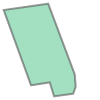

In [156]:
i

In [155]:
for i in parking_places:
    print(i.centroid.x, i.centroid.y)
    break

10.049091997326768 47.70262203043344


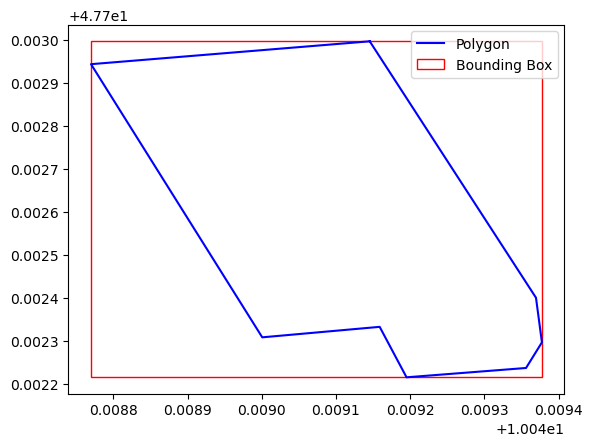

In [157]:
for polygon in parking_places:
    min_x, min_y, max_x, max_y = polygon.bounds
    fig, ax = plt.subplots()

    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue', label='Polygon')

    # Plot the bounding box
    bbox = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y,
                            fill=False, color='red', label='Bounding Box')
    ax.add_patch(bbox)

    ax.legend()

    plt.show()
    break

    #  # Save the bounding box as a GeoJSON file
    # bbox_geojson = gpd.GeoSeries([Polygon([(min_x, min_y), (max_x, min_y), (max_x, max_y), (min_x, max_y)])])
    # # bbox_geojson.crs = saar_park.crs  # Set the same coordinate reference system as the original data
    # output_path = os.path.join(output_dir, f'parking_lot_{i}_bbox.geojson') 
    # bbox_geojson.to_file(output_path, driver='GeoJSON')